In [409]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro, kstest,normaltest

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Evaluation matrics for regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


### PROBLEM STATEMENT

### DATA GATHERING

In [410]:
df=pd.read_csv(r"C:\Users\manea\OneDrive\Desktop\DATASCIENCE\MACHINE LEARNING\DATASETS\INSURANCE\insurance.csv")
df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### EDA(Exploratory Data Analysis)

In [411]:
df.shape

(1338, 7)

In [412]:
df.info() # check for information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [413]:
df.drop("sex",axis=1, inplace=True)
df.drop("region",axis=1, inplace=True)

In [414]:
df

,age,bmi,children,smoker,charges
0,19,27.900,0,yes,16884.92400
1,18,33.770,1,no,1725.55230
2,28,33.000,3,no,4449.46200
3,33,22.705,0,no,21984.47061
4,32,28.880,0,no,3866.85520
...,...,...,...,...,...
1333,50,30.970,3,no,10600.54830
1334,18,31.920,0,no,2205.98080
1335,18,36.850,0,no,1629.83350
1336,21,25.800,0,no,2007.94500


In [415]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   int64  
 3   smoker    1338 non-null   object 
 4   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 52.4+ KB


In [416]:
# chefor statastical information

df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [417]:
# check for missing values

df.isnull().sum()

age         0
bmi         0
children    0
smoker      0
charges     0
dtype: int64

<Axes: >

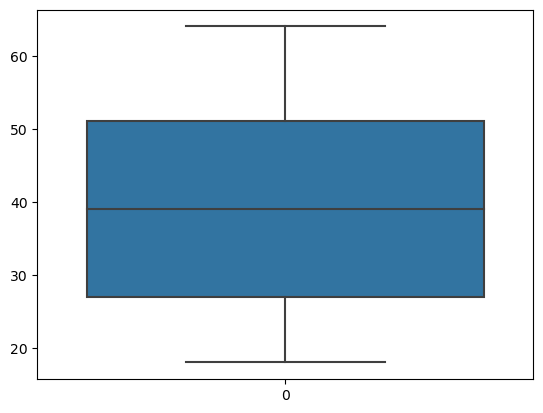

In [418]:
# check for outliers

sns.boxplot(df["age"])

<Axes: >

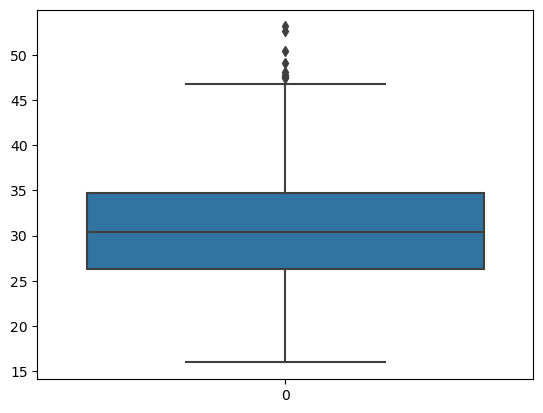

In [419]:
# check for outliers

sns.boxplot(df["bmi"])

In [420]:
q1 = df["bmi"].quantile(0.25)
q2 = df["bmi"].quantile(0.50)
q3 = df["bmi"].quantile(0.75)

iqr = q3-q1

lower_tail = q1-1.5*iqr
upper_tail = q3+1.5*iqr

In [421]:
lower_tail

13.7

In [422]:
upper_tail

47.290000000000006

In [423]:
df[df["bmi"] < lower_tail ]

,age,bmi,children,smoker,charges


In [424]:
df[df["bmi"] > upper_tail].shape

(9, 5)

In [425]:
df[df["bmi"] > upper_tail]

,age,bmi,children,smoker,charges
116,58,49.06,0,no,11381.32540
286,46,48.07,2,no,9432.92530
401,47,47.52,1,no,8083.91980
543,54,47.41,0,yes,63770.42801
847,23,50.38,1,no,2438.05520
860,37,47.60,2,yes,46113.51100
1047,22,52.58,1,yes,44501.39820
1088,52,47.74,1,no,9748.91060
1317,18,53.13,0,no,1163.46270


In [426]:
mean_without_outliers_bmi = df[(df["bmi"] < upper_tail) & (df["bmi"] > lower_tail)]["bmi"].mean()
mean_without_outliers_bmi

30.53734762979684

In [427]:
df.loc[df["bmi"] > upper_tail, "bmi"] =mean_without_outliers_bmi 

<Axes: >

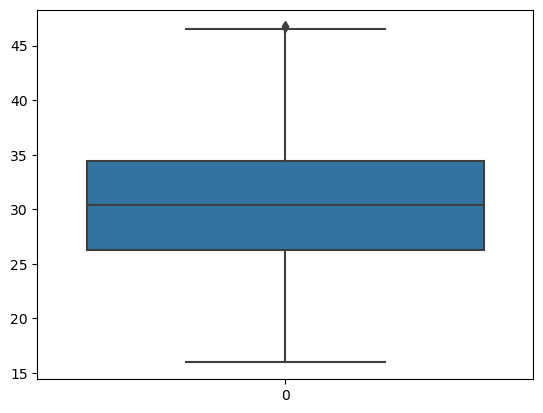

In [428]:
sns.boxplot(df["bmi"])

In [429]:
df[df["bmi"] > upper_tail]

,age,bmi,children,smoker,charges


<Axes: >

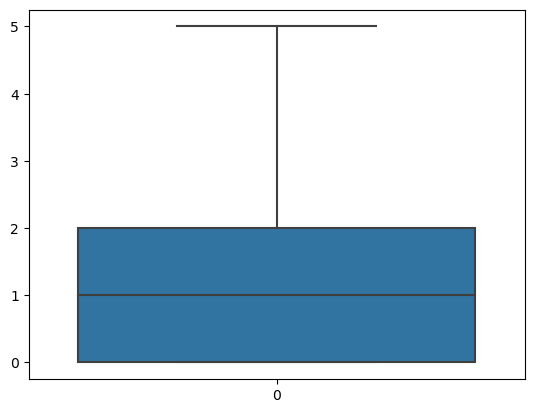

In [430]:
# check for outliers

sns.boxplot(df["children"])

## Visualization of data


<Axes: xlabel='age', ylabel='Density'>

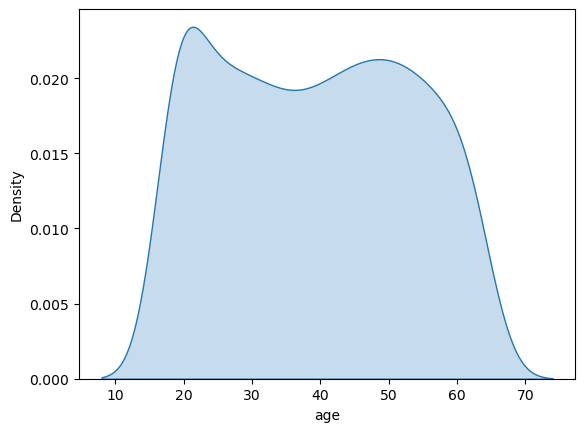

In [431]:
sns.kdeplot(df["age"], fill = True)

<Axes: xlabel='bmi', ylabel='Count'>

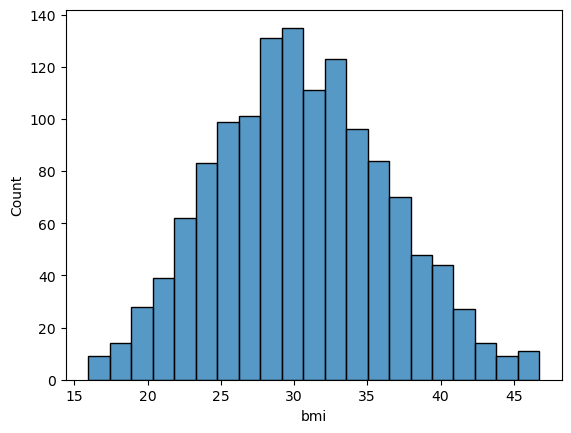

In [432]:
sns.histplot(df["bmi"])

<Axes: xlabel='children', ylabel='Density'>

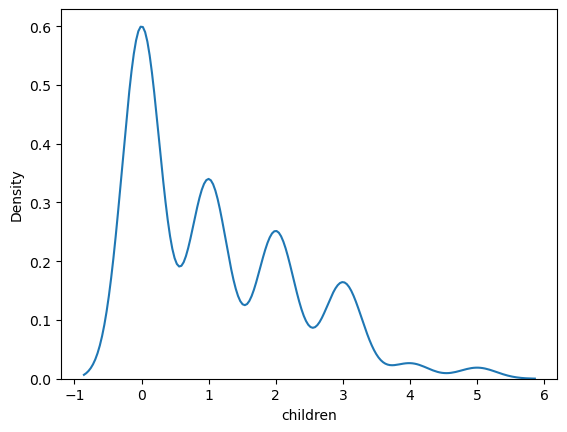

In [433]:
sns.kdeplot(df["children"])

<Axes: xlabel='smoker', ylabel='count'>

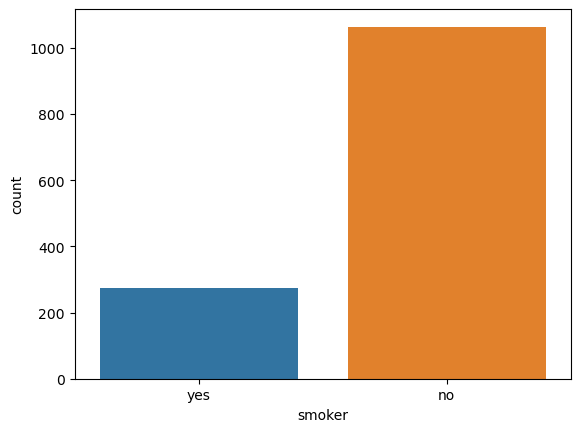

In [434]:
sns.countplot(x=df["smoker"])

### FEATURE ENGINEERING

In [435]:
# convert whole data into numerical format

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   int64  
 3   smoker    1338 non-null   object 
 4   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 52.4+ KB


In [436]:
df["smoker"].replace({'yes':1, 'no':0},inplace=True)
df

,age,bmi,children,smoker,charges
0,19,27.900,0,1,16884.92400
1,18,33.770,1,0,1725.55230
2,28,33.000,3,0,4449.46200
3,33,22.705,0,0,21984.47061
4,32,28.880,0,0,3866.85520
...,...,...,...,...,...
1333,50,30.970,3,0,10600.54830
1334,18,31.920,0,0,2205.98080
1335,18,36.850,0,0,1629.83350
1336,21,25.800,0,0,2007.94500


### FEATURE SELECTION

### Assumption 1. Linearity

In [437]:
# correlation
df.corr()

,age,bmi,children,smoker,charges
age,1.000000,0.114282,0.042469,-0.025019,0.299008
bmi,0.114282,1.000000,0.017331,-0.002856,0.190752
children,0.042469,0.017331,1.000000,0.007673,0.067998
smoker,-0.025019,-0.002856,0.007673,1.000000,0.787251
charges,0.299008,0.190752,0.067998,0.787251,1.000000


<Axes: >

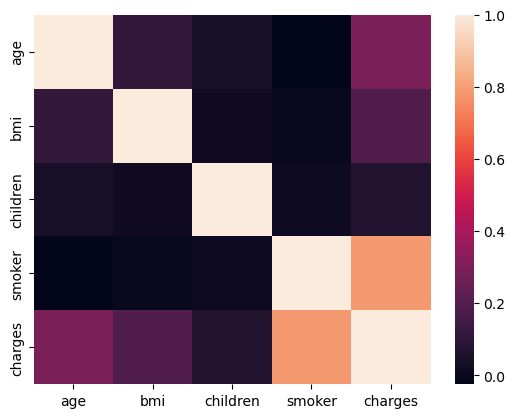

In [438]:
sns.heatmap(df.corr())

<Axes: >

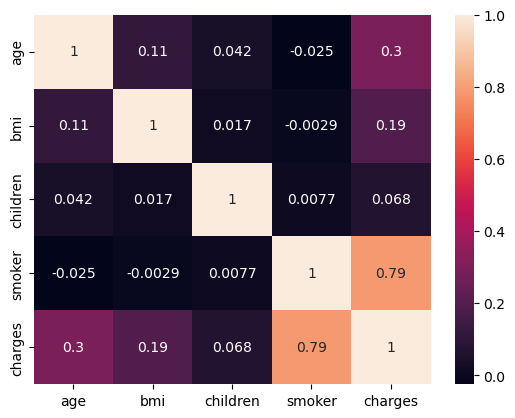

In [439]:
sns.heatmap(df.corr(), annot=True) #annot : to display number on heatmap

C:\Users\manea\anaconda3\PYTHON\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


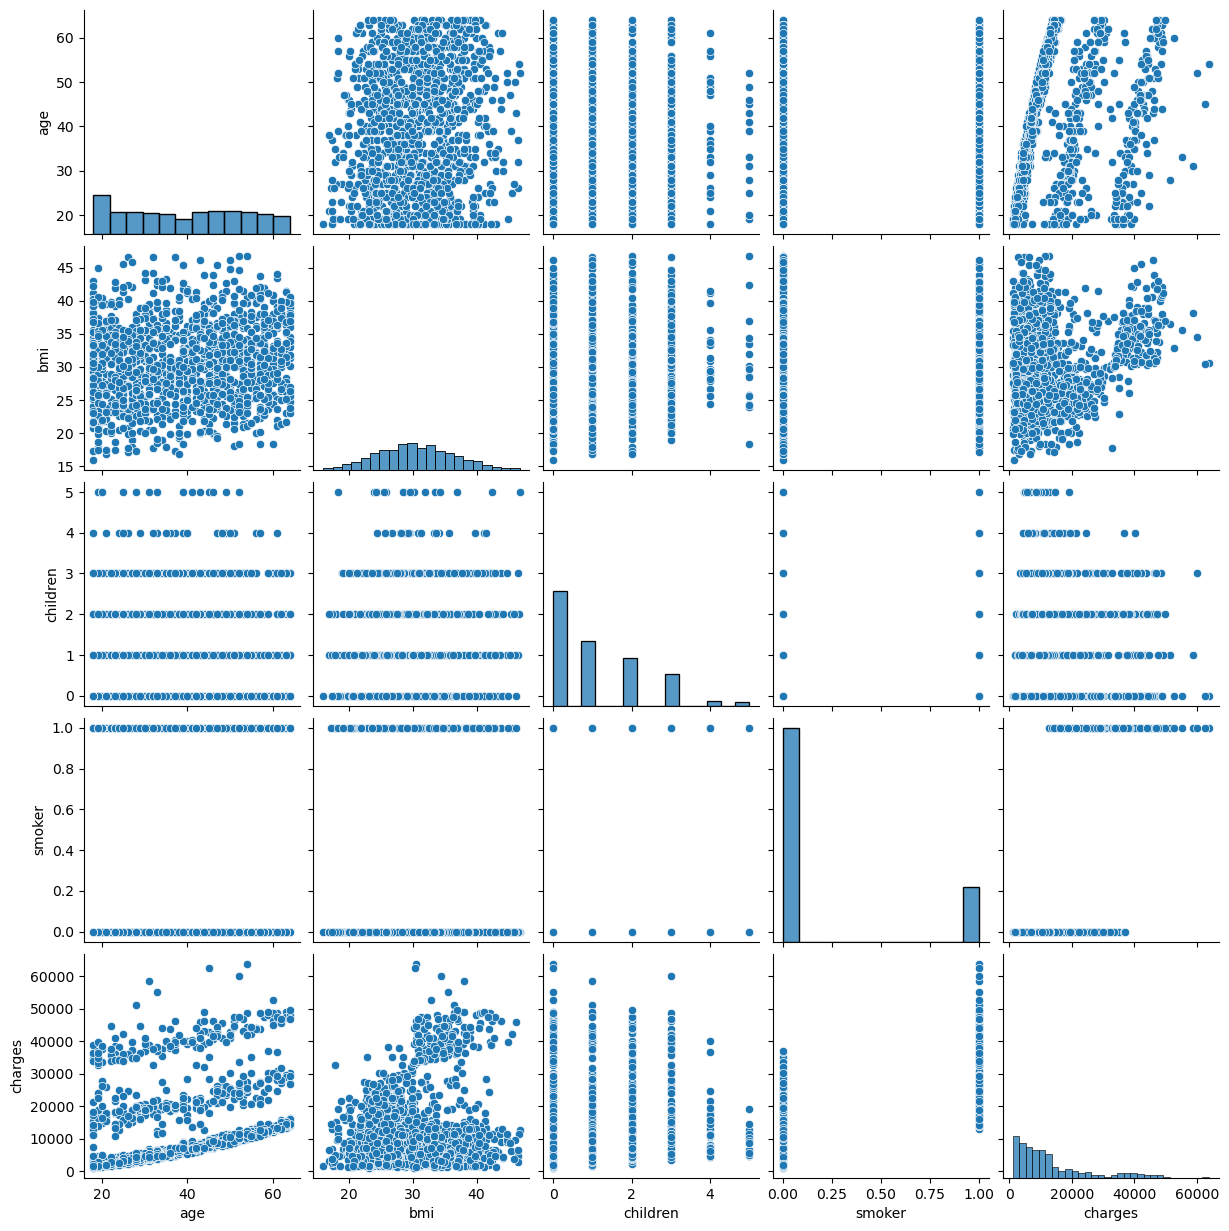

In [440]:
## pairplot

sns.pairplot(df)

### Assumption 2. No Multicolinearity

In [589]:
df1 = df.iloc[:,:4]
df1

,age,bmi,children,smoker
0,19,27.900,0,1
1,18,33.770,1,0
2,28,33.000,3,0
3,33,22.705,0,0
4,32,28.880,0,0
...,...,...,...,...
1333,50,30.970,3,0
1334,18,31.920,0,0
1335,18,36.850,0,0
1336,21,25.800,0,0


In [590]:
vif_df = pd.DataFrame()
vif_df["Features"] = df1.columns

vif_df

,Features
0,age
1,bmi
2,children
3,smoker


In [591]:
vif_list = []

for i in range(df1.shape[1]):
    vif = variance_inflation_factor(df1.to_numpy(),i)
    vif_list.append(vif)

In [592]:
vif_list

[7.64647578401584, 8.179681895685023, 1.8007180810661065, 1.24617613897557]

In [593]:
vif_df["VIF"] = vif_list

vif_df

,Features,VIF
0,age,7.646476
1,bmi,8.179682
2,children,1.800718
3,smoker,1.246176


In [647]:
x = df.iloc[:,:4] #independat features

y = df["charges"] #dependant features/target column

In [648]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [649]:
xtrain.shape

(1070, 4)

In [650]:
ytrain.shape

(1070,)

In [651]:
xtest.shape

(268, 4)

In [652]:
ytest.shape

(268,)

### ALGORITHM 1.LINEAR REGRESSION

### 5. Model Training 

In [653]:
lin_reg = LinearRegression()

lin_reg

LinearRegression()

In [654]:
lin_reg_model = lin_reg.fit(xtrain,ytrain) #BFL, minimum values of m,c,cf
lin_reg_model

LinearRegression()

### Assumption 3 : Normality of residual

In [655]:
ytrain

1199     4934.70500
1112    24180.93350
1026    16450.89470
306     20177.67113
493     12574.04900
           ...     
425      9788.86590
846      9872.70100
1319     7201.70085
597      5594.84550
1314    18765.87545
Name: charges, Length: 1070, dtype: float64

In [656]:
ytrain_predict = lin_reg_model.predict(xtrain)

In [657]:
ytrain_predict

array([ 5160.07986585, 33265.9409284 , 24983.17258076, ...,
        7392.89723958,  7768.29846332, 27932.0109083 ])

In [658]:
residual = ytrain - ytrain_predict
residual

1199     -225.374866
1112    -9085.007428
1026    -8532.277881
306     15288.392698
493     -4846.546260
            ...     
425       234.942636
846     -2597.131123
1319     -191.196390
597     -2173.452963
1314    -9166.135458
Name: charges, Length: 1070, dtype: float64

<Axes: xlabel='charges', ylabel='Density'>

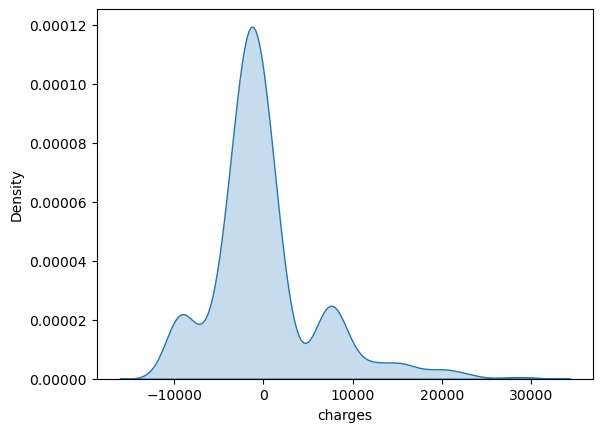

In [659]:
sns.kdeplot(residual,fill=True)

<Axes: xlabel='charges', ylabel='Count'>

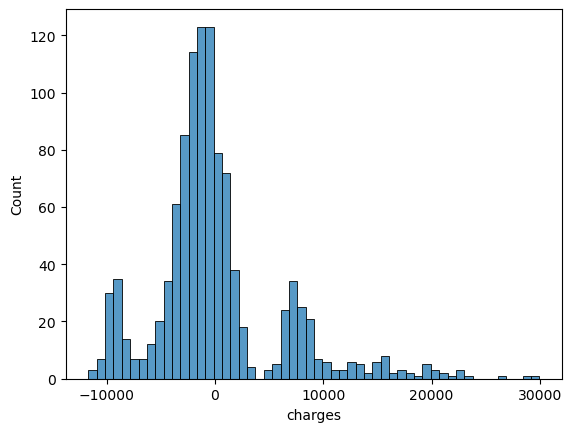

In [660]:
sns.histplot(residual)

### Hypothesis Testing

In [661]:
stats, p_val = shapiro(residual)
print(stats,p_val)

if p_val<=0.05:
    print("DATA is normally distributed")
    print("Null hypothesis H0 is true")
    
    
else:
    print("Data is not normally distributed")
    print("alternative hypothesis H1 is true")

0.8820751309394836 9.58945652696179e-28
DATA is normally distributed
Null hypothesis H0 is true


### Assumption4: Homoscadasticity

<Axes: xlabel='charges', ylabel='charges'>

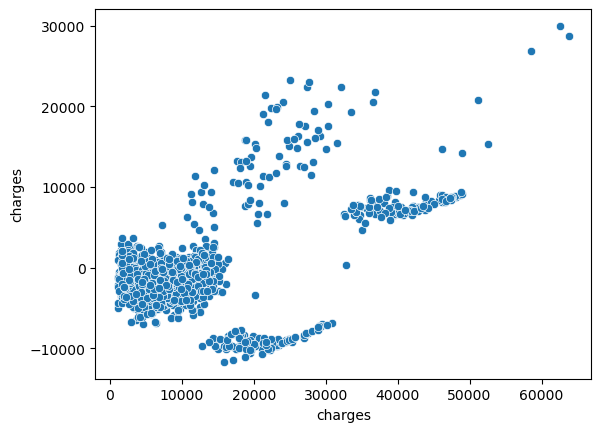

In [662]:
sns.scatterplot(x=ytrain, y=residual)

### 6. Model Evaluation

### Model evaluation for Training Data

In [663]:
mse = mean_squared_error(ytrain,ytrain_predict)
print(f"Mean Squared error : {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared error : {rmse}")

mae = mean_absolute_error(ytrain,ytrain_predict)
print(f"Mean Absolute error : {mae}")

r2score = r2_score(ytrain,ytrain_predict)
print(f"R2 score : {r2score}")

Mean Squared error : 35592755.34857744
Root Mean Squared error : 5965.966422012232
Mean Absolute error : 4062.951102719181
R2 score : 0.7395065031850843


### Model evaluation for Testing Data

In [664]:
ytest

709      5469.00660
1256    11436.73815
444     26109.32905
784      4350.51440
113      2404.73380
           ...     
1183     9447.38240
11      27808.72510
236      1615.76670
667     40003.33225
362     13844.50600
Name: charges, Length: 268, dtype: float64

In [665]:
ytest_predict = lin_reg_model.predict(xtest)
ytest_predict

array([ 6238.48476704, 13924.99797413, 34796.18949485,  5794.80232517,
        4728.87105121, 15160.17909658,  8052.83717161, 13956.06492863,
       13143.60540847, 15372.99603093, 14447.00083395, 12115.06519717,
       10272.10787461, 40347.28916181, 13858.29369244, 37546.53488258,
       15232.13344023, 15918.39360525, 32458.17501921, 12202.02312234,
        5934.27702783, 13446.23621124, 24558.88573893, 12393.83780347,
        6474.58808714, 33834.97959147,  4098.33307398, 30971.42506834,
        7247.3022844 , 15815.6441828 ,  5381.87354844, 13010.80951698,
        5639.57753889, 25776.49401955, 11105.13267016,  5153.44246833,
       13526.16117472, 36889.2608427 , 11919.42875308,  5897.90534566,
        6047.64915771, 26620.83601904,  6175.34472964, 13437.19044024,
       28863.65062646, 26072.227246  , 30859.22261383, 10264.4914053 ,
       32538.86239698,  4194.4089212 ,  2458.10295122, 36497.23879231,
       13978.65737036, 26946.31678222, 11806.04281866,  9101.22321285,
      

In [666]:
mse = mean_squared_error(ytest,ytest_predict)
print(f"Mean Squared error : {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared error : {rmse}")

mae = mean_absolute_error(ytest,ytest_predict)
print(f"Mean Absolute error : {mae}")

r2score = r2_score(ytest,ytest_predict)
print(f"R2 score : {r2score}")

Mean Squared error : 42504495.40146785
Root Mean Squared error : 6519.5471776395525
Mean Absolute error : 4452.476219932694
R2 score : 0.7681410468562273


### ALGORITHM 2.DECISION TREE

### Model Training

In [667]:
dt_reg = DecisionTreeRegressor()
dt_reg_model = dt_reg.fit(xtrain,ytrain)
dt_reg_model

DecisionTreeRegressor()

### Model Evaluation

In [668]:
#for training

ytrain_predict = dt_reg_model.predict(xtrain)

In [669]:
mse = mean_squared_error(ytrain,ytrain_predict)
print(f"Mean Squared error : {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared error : {rmse}")

mae = mean_absolute_error(ytrain,ytrain_predict)
print(f"Mean Absolute error : {mae}")

r2score = r2_score(ytrain,ytrain_predict)
print(f"R2 score : {r2score}")

Mean Squared error : 244577.25438233942
Root Mean Squared error : 494.5475248975971
Mean Absolute error : 30.761300373831773
R2 score : 0.9982100069631729


In [670]:
# For testing

ytest_predict = dt_reg_model.predict(xtest)

In [671]:
mse = mean_squared_error(ytest,ytest_predict)
print(f"Mean Squared error : {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared error : {rmse}")

mae = mean_absolute_error(ytest,ytest_predict)
print(f"Mean Absolute error : {mae}")

r2score = r2_score(ytest,ytest_predict)
print(f"R2 score : {r2score}")

Mean Squared error : 40161723.0680224
Root Mean Squared error : 6337.327754505238
Mean Absolute error : 2942.9713952611937
R2 score : 0.7809207007623903


### Decision tree by using hyperparameter tunning

In [672]:
# 1) Hyper parameter tunning

hyperparameters = {
    "criterion": ["mse", "friedman_mse", "mae", "poisson"],
    "max_depth": np.arange(2, 4),
    "min_samples_split": np.arange(2, 4),
    "min_samples_leaf": np.arange(2, 4)}

In [673]:
gscv = GridSearchCV(dt_reg_model,hyperparameters,cv=4)
gscv.fit(xtrain,ytrain)

C:\Users\manea\anaconda3\PYTHON\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
64 fits failed out of a total of 128.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
32 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\manea\anaconda3\PYTHON\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\manea\anaconda3\PYTHON\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\manea\anaconda3\PYTHON\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\manea

GridSearchCV(cv=4, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                         'max_depth': array([2, 3]),
                         'min_samples_leaf': array([2, 3]),
                         'min_samples_split': array([2, 3])})

In [674]:
gscv.best_estimator_

DecisionTreeRegressor(criterion='poisson', max_depth=3, min_samples_leaf=2)

In [675]:
dt_reg_hyp = DecisionTreeRegressor(criterion='friedman_mse', max_depth=3, min_samples_leaf=2)

In [676]:
dt_reg_hyp_model = dt_reg_hyp.fit(xtrain,ytrain)
dt_reg_hyp_model

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3, min_samples_leaf=2)

### Evaluating after hyperparameter

In [677]:
# for training

ytrain_pred = dt_reg_hyp_model.predict(xtrain)

In [678]:
mse = mean_squared_error(ytrain,ytrain_pred)
print(f"Mean Squared error : {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared error : {rmse}")

mae = mean_absolute_error(ytrain,ytrain_pred)
print(f"Mean Absolute error : {mae}")

r2score = r2_score(ytrain,ytrain_pred)
print(f"R2 score : {r2score}")

Mean Squared error : 19801856.987254817
Root Mean Squared error : 4449.927750790434
Mean Absolute error : 2631.6824864257196
R2 score : 0.8550757051674831


In [679]:
# For testing data

ytest_pred = dt_reg_hyp_model.predict(xtest)

In [680]:
mse = mean_squared_error(ytest,ytest_pred)
print(f"Mean Squared error : {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared error : {rmse}")

mae = mean_absolute_error(ytest,ytest_pred)
print(f"Mean Absolute error : {mae}")

r2score = r2_score(ytest,ytest_pred)
print(f"R2 score : {r2score}")

Mean Squared error : 26229493.849766843
Root Mean Squared error : 5121.473796649441
Mean Absolute error : 3089.4774651370167
R2 score : 0.8569200050946154


### ALGORITHM 3.RANDOM FOREST

### Model Training

In [681]:
rf_reg = RandomForestRegressor()
rf_reg

RandomForestRegressor()

In [682]:
rf_reg_model = rf_reg.fit(xtrain,ytrain)
rf_reg_model

RandomForestRegressor()

### Model Evaluation

In [683]:
# for training

ytrain_pred = rf_reg_model.predict(xtrain)

In [684]:
mse = mean_squared_error(ytrain,ytrain_pred)
print(f"Mean Squared error : {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared error : {rmse}")

mae = mean_absolute_error(ytrain,ytrain_pred)
print(f"Mean Absolute error : {mae}")

r2score = r2_score(ytrain,ytrain_pred)
print(f"R2 score : {r2score}")

Mean Squared error : 3385890.486934398
Root Mean Squared error : 1840.0789349738227
Mean Absolute error : 975.1598703161642
R2 score : 0.9752196073572834


In [685]:
# for testing

ytest_pred = rf_reg_model.predict(xtest)

In [686]:
mse = mean_squared_error(ytest,ytest_pred)
print(f"Mean Squared error : {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared error : {rmse}")

mae = mean_absolute_error(ytest,ytest_pred)
print(f"Mean Absolute error : {mae}")

r2score = r2_score(ytest,ytest_pred)
print(f"R2 score : {r2score}")

Mean Squared error : 28695460.692969605
Root Mean Squared error : 5356.8144165137555
Mean Absolute error : 2844.6373490261226
R2 score : 0.8434683340336644


### Random forest with hyperparameters tunning

In [687]:
hyperparameters = {
    "criterion": ["mse", "friedman_mse", "mae", "poisson"],
    "max_depth": np.arange(2, 5),
    "min_samples_split": np.arange(2, 5),
    "min_samples_leaf": np.arange(2, 5)}

In [688]:
gscv = GridSearchCV(rf_reg_model,hyperparameters,cv=4)
gscv.fit(xtrain,ytrain)

C:\Users\manea\anaconda3\PYTHON\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
216 fits failed out of a total of 432.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
108 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\manea\anaconda3\PYTHON\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\manea\anaconda3\PYTHON\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\manea\anaconda3\PYTHON\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\man

GridSearchCV(cv=4, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                         'max_depth': array([2, 3, 4]),
                         'min_samples_leaf': array([2, 3, 4]),
                         'min_samples_split': array([2, 3, 4])})

In [689]:
gscv.best_estimator_

RandomForestRegressor(criterion='poisson', max_depth=4, min_samples_leaf=4)

In [690]:
rf_reg_hyp = RandomForestRegressor(criterion='friedman_mse', max_depth=4, min_samples_leaf=2)
rf_reg_hyp

RandomForestRegressor(criterion='friedman_mse', max_depth=4, min_samples_leaf=2)

In [691]:
rf_reg_hyp_model = rf_reg_hyp.fit(xtrain,ytrain)
rf_reg_hyp_model

RandomForestRegressor(criterion='friedman_mse', max_depth=4, min_samples_leaf=2)

### Evaluation after hyperparameters

In [692]:
# for training

ytrain_pred = rf_reg_hyp_model.predict(xtrain)

In [693]:
mse = mean_squared_error(ytrain,ytrain_pred)
print(f"Mean Squared error : {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared error : {rmse}")

mae = mean_absolute_error(ytrain,ytrain_pred)
print(f"Mean Absolute error : {mae}")

r2score = r2_score(ytrain,ytrain_pred)
print(f"R2 score : {r2score}")

Mean Squared error : 17539426.525573414
Root Mean Squared error : 4188.009852611788
Mean Absolute error : 2324.1866725407976
R2 score : 0.8716338057273356


In [694]:
# For testing

ytest_pred = rf_reg_hyp_model.predict(xtest)

In [695]:
mse = mean_squared_error(ytest,ytest_pred)
print(f"Mean Squared error : {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared error : {rmse}")

mae = mean_absolute_error(ytest,ytest_pred)
print(f"Mean Absolute error : {mae}")

r2score = r2_score(ytest,ytest_pred)
print(f"R2 score : {r2score}")

Mean Squared error : 24539378.331880905
Root Mean Squared error : 4953.72368344066
Mean Absolute error : 2766.9570670759445
R2 score : 0.8661394632005819


### SAVING MODEL INTO PICKLE FILE

In [696]:
import pickle

In [697]:
with open("lin_model.pkl","wb") as f:
    pickle.dump(rf_reg_hyp_model,f)

#### take input from user

In [704]:
def predictions(age,bmi,children,smoker):
    test_df = pd.DataFrame({"age":[age],
                               "bmi":[bmi],
                               "children":[children],
                               "smoker":[smoker]})
    print(test_df)
    
    with open("lin_model.pkl","rb") as f:
        final_model = pickle.load(f)
        
    charges = final_model.predict(test_df)
    
    print(f"charges : Rs. {charges[0]} ")

In [705]:
predictions(20,23.11,1,0)

   age    bmi  children  smoker
0   20  23.11         1       0
charges : Rs. 3651.5060967854024 


In [706]:
predictions(40,26.11,2,1)

   age    bmi  children  smoker
0   40  26.11         2       1
charges : Rs. 20190.09981655037 
